For comparison of predicted and ground truth BINARY masks

In [1]:
import numpy as np
import cv2
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import tkinter
from tkinter import filedialog
from sklearn.metrics import jaccard_score
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

''

In [2]:
path1=filedialog.askdirectory(title='CD3P_GT')
path2=filedialog.askdirectory(title='CD3N_GT')


In [3]:
cd3p_gt=sorted(glob(path1+"/*.npy"))
cd3n_gt=sorted(glob(path2+"/*.npy"))


In [11]:
path3=filedialog.askdirectory(title='CD3P_Pred')
path4=filedialog.askdirectory(title='CD3N_Pred')


In [12]:
cd3p_pred=sorted(glob(path3+"/*.npy"))
cd3n_pred=sorted(glob(path4+"/*.npy"))

In [13]:
print(cd3p_gt[:2])
print(cd3p_pred[:2])
print(cd3n_gt[:2])
print(cd3n_pred[:2])

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/gt_same_section_validation/05-07-2024-20-05/cd3_positive_nuclei_tiles/Same folder/000000.npy', '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/gt_same_section_validation/05-07-2024-20-05/cd3_positive_nuclei_tiles/Same folder/000001.npy']
['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P_tiles/Single folder/000000.npy', '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P_tiles/Single folder/000001.npy']
['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/gt_same_section_validation/05-07-2024-20-05/cd3_negative_nuclei_tiles/Same folder/000000.npy', '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Val

In [14]:
#Simple check to ensure same non-zero number of images going in
len(cd3p_gt)==len(cd3n_gt)==len(cd3n_pred)==len(cd3p_pred)!=0

True

In [15]:
len(cd3n_gt)

21719

In [16]:
path_store=filedialog.askdirectory(title='path for csv')

In [17]:
path_store

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial'

In [18]:
l_p=[]

lst_p=[]

l_tf_p=[]

lst_n=[]

l_tf_n=[]



for i in range(len(cd3p_gt)):
    
    img1=np.load(cd3p_gt[i])
    v1,c1=np.unique(img1,return_counts=True)
    #print('gt_p:', v1)
    dict1=dict(map(lambda i,j : (i,j) , v1,c1))
    
    img2=np.load(cd3n_gt[i])
    v2,c2=np.unique(img2,return_counts=True)
    dict2=dict(map(lambda i,j : (i,j) , v2,c2))

    img3=np.load(cd3p_pred[i])
    v3,c3=np.unique(img3,return_counts=True)
    dict3=dict(map(lambda i,j : (i,j) , v3,c3))
    
    img4=np.load(cd3n_pred[i])
    v4,c4=np.unique(img4,return_counts=True)
    dict4=dict(map(lambda i,j : (i,j) , v4,c4))
    common_gt=list(set(v1)&set(v2))

    for x in common_gt:
        if(dict1[x]>dict2[x]):
            img2[img2==x]=0
        else:
            img1[img1==x]=0

    
    common_pred=list(set(v3)&set(v4))
    for x in common_pred:
        if(dict3[x]>dict4[x]):
            img4[img4==x]=0
        else:
            img3[img3==x]=0
        
    gt_p = []
    gt_n = []
    pred_p = []
    pred_n = []
    
    gt = []
    pred = []

    # Re-counting after removing any intersecting elements
    v1,c1=np.unique(img1,return_counts=True)
    gt_p = v1[(v1 != 0)]
    
 
    v2,c2=np.unique(img2,return_counts=True)
    gt_n = v2[(v2 != 0)]
    

    v3,c3=np.unique(img3,return_counts=True)
    pred_p = v3[~np.isin(v3, pred_p) & (v3 != 0)]

    
    v4,c4=np.unique(img4,return_counts=True)
    pred_n = v4[~np.isin(v4, pred_n) & (v4 != 0)]
    
    #common_pred=list(set(v2)&set(v4))
    #for x in common_pred:
    #    img5[img5==x]=0
        
        
 
    #v1,c1=np.unique(img1,return_counts=True)
    
 
    #v3,c3=np.unique(img4,return_counts=True)
    

    #v2,c2=np.unique(img2,return_counts=True)
    

    #v4,c4=np.unique(img5,return_counts=True)
    
    #print(len(v4))
    print("next")
    #img3=img1*np.logical_and(img1,img2)
    
  
    #img6=img4*np.logical_and(img4,img5)

    
    l_p.append(cd3p_gt[i].split("/")[-1])
    
    
    
    lst_p.append(len(v1))
    l_tf_p.append(len(v3))
    #l_tf_p.append(len(set(v1)&set(v2)))
    
  
    
    
    lst_n.append(len(v2))
    l_tf_n.append(len(v4))
    #l_tf_n.append(len(set(v3)&set(v4)))
    
#a1=np.average(lst)
#a2=np.average(l_tf)
#lst_p.append(a1)
#l_tf_p.append(a2)
#lst_p.append(a1)
#l_tf_p.append(a2)
#l_p.append("Total")
df=pd.DataFrame({'name': l_p,'GT_CD3P':lst_p,'Pred_CD3P':l_tf_p,'GT_CD3N':lst_n,'Pred_CD3N':l_tf_n})
#path3
df.to_csv(path_store+"/validation_tiles_serial.csv",index=False)

next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next
next


In [71]:
df=pd.DataFrame({'name': l_p,'GT_CD3P':lst_p,'Pred_CD3P':l_tf_p,'GT_CD3N':lst_n,'Pred_CD3N':l_tf_n})
df

,name,GT_CD3P,Pred_CD3P,GT_CD3N,Pred_CD3N
0,000.npy,1064,583,3732,4213
1,001.npy,472,521,3776,3727


In [66]:
l_p = []
lst_p = []
l_tf_p = []
lst_n = []
l_tf_n = []

for i in range(len(cd3p_gt)):
    img1 = np.load(cd3p_gt[i])
    img2 = np.load(cd3n_gt[i])
    img3 = np.load(cd3p_pred[i])
    img4 = np.load(cd3n_pred[i])
    
    # Get unique values and counts for ground truth and predictions
    v1, c1 = np.unique(img1, return_counts=True)
    v2, c2 = np.unique(img2, return_counts=True)
    v3, c3 = np.unique(img3, return_counts=True)
    v4, c4 = np.unique(img4, return_counts=True)

    dict1 = dict(zip(v1, c1))
    dict2 = dict(zip(v2, c2))
    dict3 = dict(zip(v3, c3))
    dict4 = dict(zip(v4, c4))

    # Remove common elements based on counts
    common_gt = set(v1) & set(v2)
    for x in common_gt:
        if dict1[x] > dict2[x]:
            img2[img2 == x] = 0
        else:
            img1[img1 == x] = 0

    common_pred = set(v3) & set(v4)
    for x in common_pred:
        if dict3[x] > dict4[x]:
            img4[img4 == x] = 0
        else:
            img3[img3 == x] = 0

    # Re-count after removing intersecting elements
    gt_p = np.unique(img1[img1 != 0])
    gt_n = np.unique(img2[img2 != 0])
    pred_p = np.unique(img3[img3 != 0])
    pred_n = np.unique(img4[img4 != 0])

    # Append results to lists
    l_p.append(os.path.basename(cd3p_gt[i]))
    lst_p.append(len(gt_p))
    l_tf_p.append(len(pred_p))
    lst_n.append(len(gt_n))
    l_tf_n.append(len(pred_n))

    print(len(pred_n))
    print("next")

# Create DataFrame and save to CSV
df = pd.DataFrame({
    'name': l_p,
    'GT_CD3P': lst_p,
    'Pred_CD3P': l_tf_p,
    'GT_CD3N': lst_n,
    'Pred_CD3N': l_tf_n
})

#path_store = "/path/to/store"  # Replace with the actual path
df.to_csv(os.path.join(path_store, "serial_test_17May.csv"), index=False)

print("Processing complete and CSV saved.")


4212
next
3726
next
9757
next


KeyboardInterrupt: 

In [68]:
df = pd.DataFrame({
    'name': l_p,
    'GT_CD3P': lst_p,
    'Pred_CD3P': l_tf_p,
    'GT_CD3N': lst_n,
    'Pred_CD3N': l_tf_n
})

In [69]:
df

,name,GT_CD3P,Pred_CD3P,GT_CD3N,Pred_CD3N
0,000.npy,1063,582,3731,4212
1,001.npy,471,520,3775,3726
2,002.npy,38,2688,12407,9757


In [21]:
a=np.load('/home/saab/Desktop/Validation_Pred_IoU/same/000.npy')
b=np.load('/home/saab/Desktop/Validation_Pred_IoU/serial/000.npy')
c=np.load('/home/saab/Desktop/000.npy')

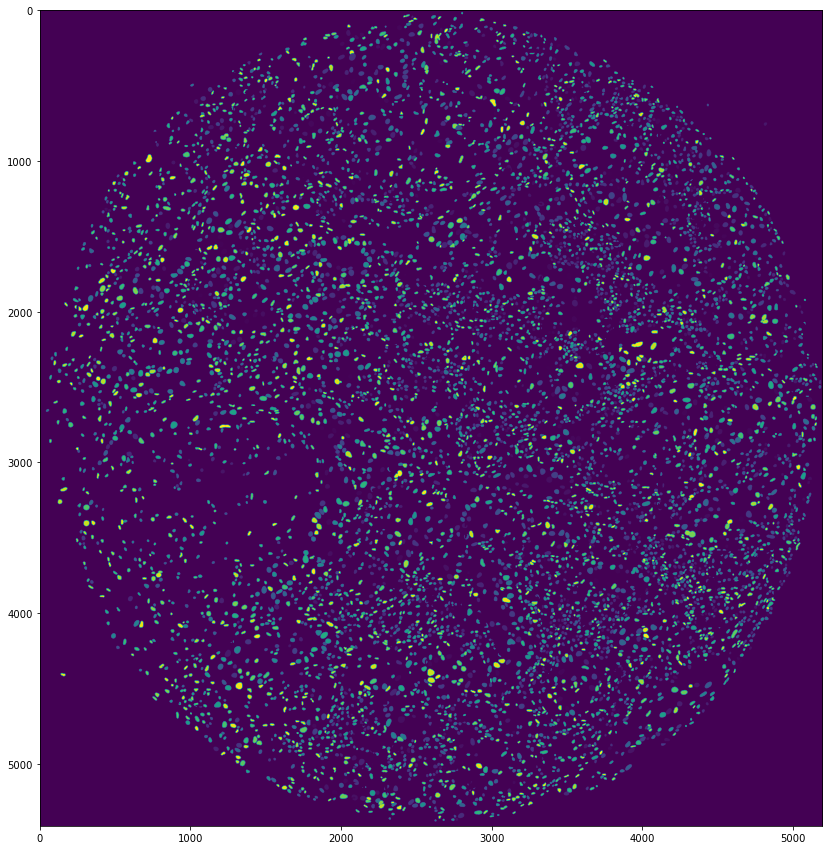

In [43]:
plt.figure(figsize=(15,15))
plt.imshow(img5)

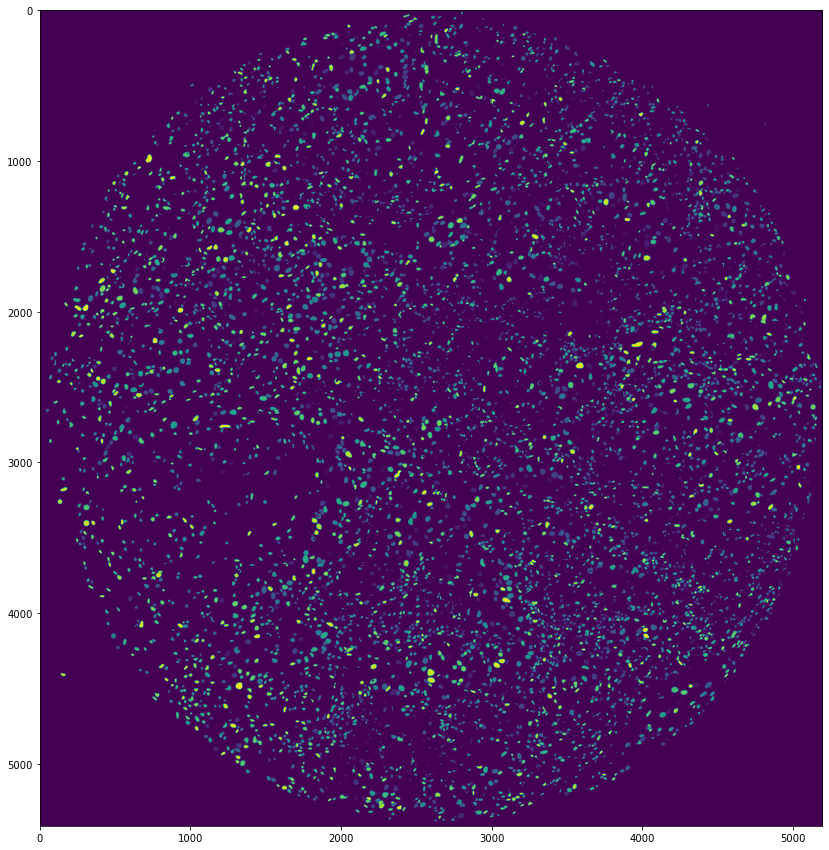

In [42]:
plt.figure(figsize=(15,15))
plt.imshow(img4)

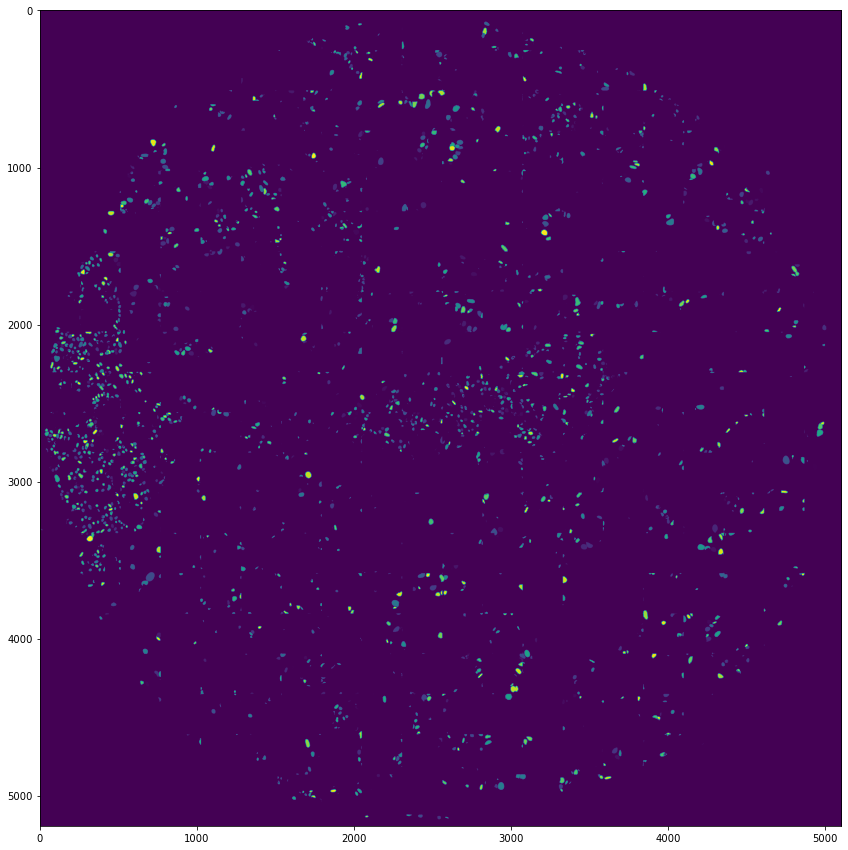

In [23]:
plt.figure(figsize=(15,15))
plt.imshow(b)

In [8]:
v2,c2=np.unique(c,return_counts=True)

In [10]:
len(v2)

1320